In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [63]:
df=pd.read_excel('titanic3.xls')

In [64]:
df=df.drop(columns=['pclass','name','sibsp','parch','boat','body','home.dest','embarked','cabin','ticket'])

In [47]:
df.head()

,survived,sex,age,fare
0,1,female,NaN,NaN
1,1,male,0.9167,151.55
2,0,female,2.0000,151.55
3,0,male,30.0000,151.55
4,0,female,25.0000,151.55


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 4 columns):
survived    1309 non-null int64
sex         1309 non-null object
age         1041 non-null float64
fare        1292 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 41.0+ KB


In [66]:
df.isnull().mean()

survived    0.000000
sex         0.000000
age         0.204736
fare        0.012987
dtype: float64

In [68]:
x = df.drop(columns=['survived'])
y=df['survived']

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [71]:
x_train.shape,x_test.shape

((1047, 3), (262, 3))

In [72]:
x_train.isnull().mean()

sex     0.000000
age     0.201528
fare    0.014327
dtype: float64

In [74]:
# mean of age and fare
mean_age=x_train['age'].mean()
median_age=x_train['age'].median()

mean_fare=x_train['fare'].mean()
median_fare=x_train['fare'].median()

In [76]:
x_train['age_median']=x_train['age'].fillna(median_age)
x_train['age_mean']=x_train['age'].fillna(median_age)

x_train['fare_median']=x_train['fare'].fillna(median_age)
x_train['fare_mean']=x_train['fare'].fillna(median_age)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [77]:
x_train.sample(5)

,sex,age,fare,Age_median,Age_mean,age_median,age_mean,fare_median,fare_mean
692,female,18.5,7.2833,18.5,18.5,18.5,18.5,7.2833,7.2833
496,male,30.0,13.0000,30.0,30.0,30.0,30.0,13.0000,13.0000
413,male,38.0,21.0000,38.0,38.0,38.0,38.0,21.0000,21.0000
106,male,NaN,221.7792,28.0,28.0,28.0,28.0,221.7792,221.7792
1265,female,10.0,24.1500,10.0,10.0,10.0,10.0,24.1500,24.1500


In [79]:
print('Original Age variable variance: ',x_train['age'].var())
print(' Age variance after median imputation: ',x_train['age_median'].var())
print('Age variance after mean imputation: ',x_train['age_mean'].var())

print('Original Fare variable variance: ',x_train['fare'].var())
print(' Fare variance after median imputation: ',x_train['fare_median'].var())
print(' Fare variance after mean imputation: ',x_train['fare_mean'].var())


Original Age variable variance:  205.51965030913723
 Age variance after median imputation:  164.3448547978684
Age variance after mean imputation:  164.3448547978684
Original Fare variable variance:  2779.3344557316227
 Fare variance after median imputation:  2739.996020270529
 Fare variance after mean imputation:  2739.996020270529


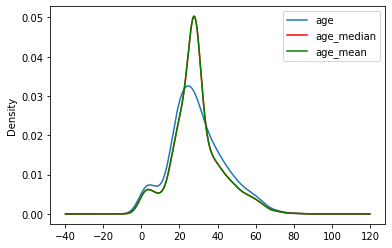

In [81]:
fig=plt.figure()
ax=fig.add_subplot(111)

# original variable distribution
x_train['age'].plot(kind='kde' , ax=ax)

# variable impute with the variable
x_train['age_median'].plot(kind='kde',ax=ax,color='red')

# variable imputed with the mean
x_train['age_mean'].plot(kind='kde',ax=ax, color='green')

# add Legend
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

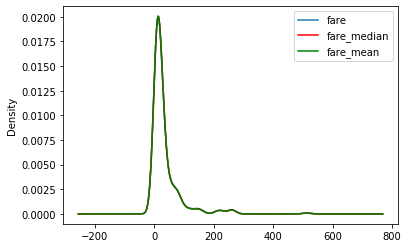

In [82]:
fig=plt.figure()
ax=fig.add_subplot(111)

# original variable distribution
x_train['fare'].plot(kind='kde' , ax=ax)

# variable impute with the variable
x_train['fare_median'].plot(kind='kde',ax=ax,color='red')

# variable imputed with the mean
x_train['fare_mean'].plot(kind='kde',ax=ax, color='green')

# add Legend
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [83]:
x_train.cov()

,age,fare,Age_median,Age_mean,age_median,age_mean,fare_median,fare_mean
age,205.519650,152.841846,205.519650,205.519650,205.519650,205.519650,148.771950,148.771950
fare,152.841846,2779.334456,124.494927,124.494927,124.494927,124.494927,2779.334456,2779.334456
Age_median,205.519650,124.494927,164.344855,164.344855,164.344855,164.344855,121.687217,121.687217
Age_mean,205.519650,124.494927,164.344855,164.344855,164.344855,164.344855,121.687217,121.687217
age_median,205.519650,124.494927,164.344855,164.344855,164.344855,164.344855,121.687217,121.687217
age_mean,205.519650,124.494927,164.344855,164.344855,164.344855,164.344855,121.687217,121.687217
fare_median,148.771950,2779.334456,121.687217,121.687217,121.687217,121.687217,2739.996020,2739.996020
fare_mean,148.771950,2779.334456,121.687217,121.687217,121.687217,121.687217,2739.996020,2739.996020


In [84]:
x_train.corr()

,age,fare,Age_median,Age_mean,age_median,age_mean,fare_median,fare_mean
age,1.000000,0.191945,1.000000,1.000000,1.000000,1.000000,0.186908,0.186908
fare,0.191945,1.000000,0.185486,0.185486,0.185486,0.185486,1.000000,1.000000
Age_median,1.000000,0.185486,1.000000,1.000000,1.000000,1.000000,0.181339,0.181339
Age_mean,1.000000,0.185486,1.000000,1.000000,1.000000,1.000000,0.181339,0.181339
age_median,1.000000,0.185486,1.000000,1.000000,1.000000,1.000000,0.181339,0.181339
age_mean,1.000000,0.185486,1.000000,1.000000,1.000000,1.000000,0.181339,0.181339
fare_median,0.186908,1.000000,0.181339,0.181339,0.181339,0.181339,1.000000,1.000000
fare_mean,0.186908,1.000000,0.181339,0.181339,0.181339,0.181339,1.000000,1.000000


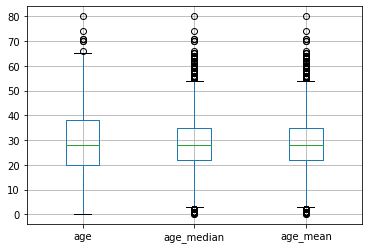

In [85]:
x_train[['age','age_median','age_mean']].boxplot()  # major changes outliers

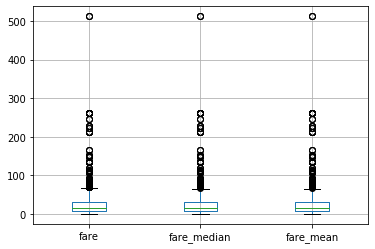

In [86]:
x_train[['fare','fare_median','fare_mean']].boxplot() # no major change

In [88]:
# Using Sklearn

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [90]:
impute1=SimpleImputer(strategy='median')
impute2=SimpleImputer(strategy='mean')

In [91]:
trf=ColumnTransformer([
    ('impute1',impute1,['age']),
    ('impute2',impute2,['fare'])

],remainder='passthrough')

In [92]:
trf.fit(x_train)

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('impute1',
                                 SimpleImputer(add_indicator=False, copy=True,
                                               fill_value=None,
                                               missing_values=nan,
                                               strategy='median', verbose=0),
                                 ['age']),
                                ('impute2',
                                 SimpleImputer(add_indicator=False, copy=True,
                                               fill_value=None,
                                               missing_values=nan,
                                               strategy='mean', verbose=0),
                                 ['fare'])],
                  verbose=False)

In [95]:
trf.named_transformers_['impute1'].statistics_

array([28.])

In [96]:
trf.named_transformers_['impute2'].statistics_ 

array([34.0547031])

In [98]:
x_train=trf.transform(x_train)
x_test=trf.transform(x_test)

In [99]:
x_train

array([[25.0, 30.0, 'female'],
       [37.0, 53.1, 'male'],
       [9.0, 15.2458, 'female'],
       ...,
       [31.0, 37.0042, 'male'],
       [28.0, 10.5, 'male'],
       [24.5, 8.05, 'male']], dtype=object)